# Week 8 Practice

## Black-Scholes Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

###  European Options

Non-Dividend Paying Options

In [2]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [3]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [4]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

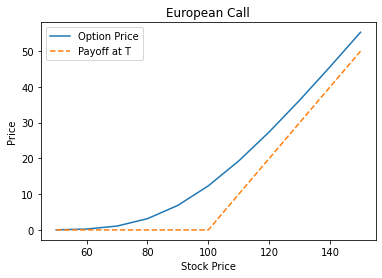

In [5]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

Dividend Paying Options

In [6]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [7]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [8]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

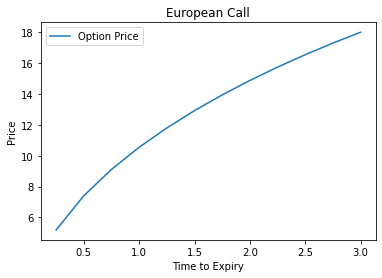

In [9]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

### Option Trading

Has Black Scholes correctly predicted the market value of the options?

In [10]:
AAPL = yf.Ticker('AAPL')
opt = AAPL.option_chain('2022-11-18')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221118C00050000,2022-11-04 18:43:38+00:00,50.0,86.65,99.30,99.95,0.000000,0.000000,4.0,9.0,3.996094,True,REGULAR,USD
1,AAPL221118C00055000,2022-11-03 18:17:55+00:00,55.0,84.45,94.25,94.90,0.000000,0.000000,80.0,0.0,3.554689,True,REGULAR,USD
2,AAPL221118C00060000,2022-11-11 16:16:03+00:00,60.0,87.45,89.30,90.00,4.489998,5.412244,2.0,3.0,3.464845,True,REGULAR,USD
3,AAPL221118C00065000,2022-11-03 19:33:52+00:00,65.0,74.95,84.40,85.05,0.000000,0.000000,40.0,0.0,2.343754,True,REGULAR,USD
4,AAPL221118C00070000,2022-11-09 15:00:53+00:00,70.0,67.50,79.30,79.90,0.000000,0.000000,3.0,3.0,2.753909,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,AAPL221118C00260000,2022-11-03 13:30:00+00:00,260.0,0.01,0.00,0.01,0.000000,0.000000,1.0,1391.0,1.312503,False,REGULAR,USD
71,AAPL221118C00270000,2022-11-03 19:45:17+00:00,270.0,0.01,0.00,0.01,0.000000,0.000000,1.0,2624.0,1.406253,False,REGULAR,USD
72,AAPL221118C00280000,2022-11-08 15:22:05+00:00,280.0,0.01,0.00,0.01,0.000000,0.000000,1.0,1983.0,1.500002,False,REGULAR,USD
73,AAPL221118C00290000,2022-11-08 18:19:30+00:00,290.0,0.01,0.00,0.01,0.000000,0.000000,2.0,880.0,1.562502,False,REGULAR,USD


In [11]:
data = yf.download("AAPL", start="2021-11-11", end="2022-11-11")

[*********************100%***********************]  1 of 1 completed


In [12]:
data['Adj Close']

Date
2021-11-11    147.016754
2021-11-12    149.124527
2021-11-15    149.134460
2021-11-16    150.128677
2021-11-17    152.604324
                 ...    
2022-11-04    138.380005
2022-11-07    138.919998
2022-11-08    139.500000
2022-11-09    134.869995
2022-11-10    146.869995
Name: Adj Close, Length: 252, dtype: float64

In [13]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1/52
r = 0.0382
q = 0.0061
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.35480418623063775

In [14]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [15]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL221118C00050000,2022-11-04 18:43:38+00:00,50.0,86.65,99.30,99.95,0.000000,0.000000,4.0,9.0,3.996094,True,REGULAR,USD,96.89
1,AAPL221118C00055000,2022-11-03 18:17:55+00:00,55.0,84.45,94.25,94.90,0.000000,0.000000,80.0,0.0,3.554689,True,REGULAR,USD,91.89
2,AAPL221118C00060000,2022-11-11 16:16:03+00:00,60.0,87.45,89.30,90.00,4.489998,5.412244,2.0,3.0,3.464845,True,REGULAR,USD,86.90
3,AAPL221118C00065000,2022-11-03 19:33:52+00:00,65.0,74.95,84.40,85.05,0.000000,0.000000,40.0,0.0,2.343754,True,REGULAR,USD,81.90
4,AAPL221118C00070000,2022-11-09 15:00:53+00:00,70.0,67.50,79.30,79.90,0.000000,0.000000,3.0,3.0,2.753909,True,REGULAR,USD,76.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,AAPL221118C00260000,2022-11-03 13:30:00+00:00,260.0,0.01,0.00,0.01,0.000000,0.000000,1.0,1391.0,1.312503,False,REGULAR,USD,0.00
71,AAPL221118C00270000,2022-11-03 19:45:17+00:00,270.0,0.01,0.00,0.01,0.000000,0.000000,1.0,2624.0,1.406253,False,REGULAR,USD,0.00
72,AAPL221118C00280000,2022-11-08 15:22:05+00:00,280.0,0.01,0.00,0.01,0.000000,0.000000,1.0,1983.0,1.500002,False,REGULAR,USD,0.00
73,AAPL221118C00290000,2022-11-08 18:19:30+00:00,290.0,0.01,0.00,0.01,0.000000,0.000000,2.0,880.0,1.562502,False,REGULAR,USD,0.00


In [16]:
opt.calls['estimate_error'] = ((opt.calls['BSMPrice'] - opt.calls['lastPrice'])/opt.calls['lastPrice'])*100
opt.calls['estimate_error']

0      11.817657
1       8.809947
2      -0.628931
3       9.272849
4      13.925926
         ...    
70   -100.000000
71   -100.000000
72   -100.000000
73   -100.000000
74   -100.000000
Name: estimate_error, Length: 75, dtype: float64

In [17]:
opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     75.000000
mean     -42.379299
std       43.662817
min     -100.000000
25%     -100.000000
50%      -26.388889
75%      -11.270401
max       64.444444
Name: estimate_error, dtype: float64

Our mean estimation error is -59.41%, with a standard deviation of 44.79% points. Our median is even more promising at around -86.91%. Our standard deviation still seems a bit high.

Text(0.5, 1.0, 'Histogram of Estimate Error')

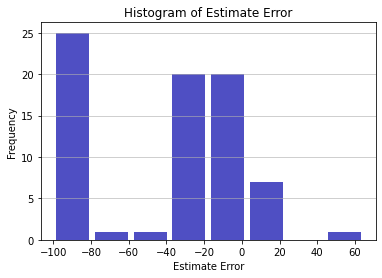

In [18]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

### Mibian - Options Pricing Library

MibianLib is an open source python library for options pricing. You can use it to calculate the price, the implied volatility, the greeks or the put/call parity of an option using the Black-Scholes(-Merton) pricing models.

In [19]:
pip install mibian

Note: you may need to restart the kernel to use updated packages.


In [20]:
import mibian as mb

In [21]:
option_100 = mb.BS([S, 150, r*100, 30], volatility = vol*100)

# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [22]:
option_100.callPrice

4.7747297278577605

In [23]:
option_100d = mb.Me([S, 150, r*100, q*100, 30], volatility = vol*100)

# Used for pricing European options on stocks with dividends
# Me([underlyingPrice, strikePrice, interestRate, annualDividends, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [24]:
option_100d.callPrice

4.7522036982442515

In [25]:
AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 7], volatility = vol*100).callPrice

In [26]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(AAPL_mb_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL221118C00050000,2022-11-04 18:43:38+00:00,50.0,86.65,99.30,99.95,0.000000,0.000000,4.0,9.0,3.996094,True,REGULAR,USD,96.89,11.817657,96.89
1,AAPL221118C00055000,2022-11-03 18:17:55+00:00,55.0,84.45,94.25,94.90,0.000000,0.000000,80.0,0.0,3.554689,True,REGULAR,USD,91.89,8.809947,91.90
2,AAPL221118C00060000,2022-11-11 16:16:03+00:00,60.0,87.45,89.30,90.00,4.489998,5.412244,2.0,3.0,3.464845,True,REGULAR,USD,86.90,-0.628931,86.90
3,AAPL221118C00065000,2022-11-03 19:33:52+00:00,65.0,74.95,84.40,85.05,0.000000,0.000000,40.0,0.0,2.343754,True,REGULAR,USD,81.90,9.272849,81.91
4,AAPL221118C00070000,2022-11-09 15:00:53+00:00,70.0,67.50,79.30,79.90,0.000000,0.000000,3.0,3.0,2.753909,True,REGULAR,USD,76.90,13.925926,76.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,AAPL221118C00260000,2022-11-03 13:30:00+00:00,260.0,0.01,0.00,0.01,0.000000,0.000000,1.0,1391.0,1.312503,False,REGULAR,USD,0.00,-100.000000,0.00
71,AAPL221118C00270000,2022-11-03 19:45:17+00:00,270.0,0.01,0.00,0.01,0.000000,0.000000,1.0,2624.0,1.406253,False,REGULAR,USD,0.00,-100.000000,0.00
72,AAPL221118C00280000,2022-11-08 15:22:05+00:00,280.0,0.01,0.00,0.01,0.000000,0.000000,1.0,1983.0,1.500002,False,REGULAR,USD,0.00,-100.000000,0.00
73,AAPL221118C00290000,2022-11-08 18:19:30+00:00,290.0,0.01,0.00,0.01,0.000000,0.000000,2.0,880.0,1.562502,False,REGULAR,USD,0.00,-100.000000,0.00


In [27]:
opt.calls['estimate_error_mb'] = ((opt.calls['MB_BSMPrice'] - opt.calls['lastPrice'] )/opt.calls['lastPrice'] )*100
opt.calls['estimate_error_mb']

0      11.817657
1       8.821788
2      -0.628931
3       9.286191
4      13.940741
         ...    
70   -100.000000
71   -100.000000
72   -100.000000
73   -100.000000
74   -100.000000
Name: estimate_error_mb, Length: 75, dtype: float64

In [28]:
opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     75.000000
mean     -42.372360
std       43.671597
min     -100.000000
25%     -100.000000
50%      -26.388889
75%      -11.247026
max       64.516129
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

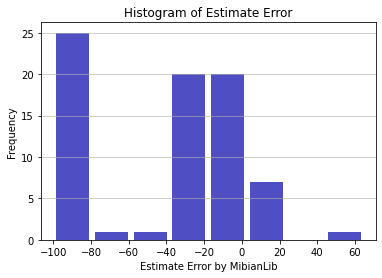

In [29]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

Although the mean and median estimation of error have increased, the standard deviation has decreased. Overall, the results is consistent.